In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

df=pd.read_json('jobs.json')
df.shape

FileNotFoundError: File jobs.json does not exist

In [2]:
def clean_text(text):
    # Remove HTML tags
    cleaned_text = re.sub(r"<.*?>", "", text)
    # Remove special characters and escape sequences
    cleaned_text = re.sub(r"[\r\n]", " ", cleaned_text)
    # Standardize text (lowercase, remove extra spaces)
    cleaned_text = " ".join(cleaned_text.lower().split())
    return cleaned_text

In [3]:
df['location'].value_counts().head(20)

location
New York, NY         93
Charlotte, NC        47
Austin, TX           42
Jersey City, NJ      40
Dallas, TX           37
Remote               36
Atlanta, GA          35
Chicago, IL          33
Plano, TX            30
Houston, TX          27
Irving, TX           23
Boston, MA           19
Reston, VA           17
San Francisco, CA    14
Philadelphia, PA     14
Washington DC        13
Tampa, FL            12
Richmond, VA         12
Phoenix, AZ          11
Pittsburgh, PA       11
Name: count, dtype: int64

In [4]:
df['snippet']=df['snippet'].apply(lambda x:clean_text(x)).replace(r'&nbsp;(\.\.\.)?', '', regex=True)
df['updated']=df['updated'].apply(lambda row:row[:10]).pipe(lambda df:pd.to_datetime(df))


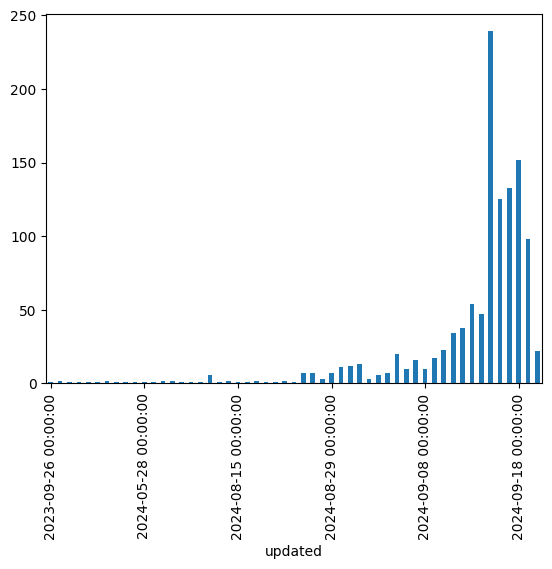

In [5]:
df['title'].value_counts().head(20)
df['updated'].value_counts().sort_index().plot(kind='bar')
plt.xticks(range(0,len(df['updated'].value_counts()),10))
plt.show()

Most frequent words in snippet

In [6]:
pd.Series(
    " ".join(df['snippet']).split()
    ).value_counts(ascending=False).head(20)


and           1603
python         908
in             855
a              822
developer      748
to             719
with           712
experience     651
of             625
the            576
for            509
is             418
job            400
python,        300
or             297
data           291
software       278
our            265
are            245
-              240
Name: count, dtype: int64

In [7]:
pd.Series(
    " ".join(df['title']).split()
    ).value_counts(ascending=False).head(20)

Developer      808
Python         478
Senior         120
Software       119
-              103
Engineer       101
developer       60
Full            54
with            50
Stack           49
Java            48
python          47
Data            46
Lead            42
/               37
AWS             29
and             26
Sr.             25
Cloud           23
Application     23
Name: count, dtype: int64

In [8]:
df['company'].value_counts().head(10)

company
Diverse Lynx                       94
Saxon Global                       46
Syntricate Technologies            21
ApTask                             21
EPAM Systems, Inc.                 20
Expert In Recruitment Solutions    16
Syntricate Technologies Inc        16
Jobot                              10
SynergisticIT                      10
Genesis10                          10
Name: count, dtype: int64

In [9]:
df['type'].value_counts()

type
                        708
Full-time               345
Temporary                96
Full-time, Temporary      3
Part-time                 1
Name: count, dtype: int64

In [16]:
reed_df=pd.read_json('reed_jobs.json')
reed_df['locationName'].value_counts()

locationName
London               499
Manchester            59
Birmingham            56
Bristol               55
Leeds                 43
                    ... 
Sarisbury Green        1
Perivale               1
BS348PU                1
Warton                 1
Ashby-de-la-Zouch      1
Name: count, Length: 1121, dtype: int64

In [17]:
reed_df['jobTitle'].value_counts()

jobTitle
Coding and Programming Trainee         94
Data Engineer                          69
Senior Data Engineer                   27
Field Service Engineer                 26
Maintenance Engineer                   24
                                       ..
Lead Front-End Engineer                 1
HVAC Design Engineer Mechanical         1
One Identity IAM Engineer               1
CNC Programmer, Production Engineer     1
Backend Developer                       1
Name: count, Length: 1877, dtype: int64